In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/AirIndia (Domestic).csv')
data

,Month,DEPARTURES\n,HOURS\n,KILOMETER\n(TH),PASSENGERS CARRIED\n,PASSENGER KMS. PERFORMED\n(TH),AVAILABLE SEAT KILOMETRE\n(TH),PAX. LOAD FACTOR#\n(IN %),FY
0,APR,8331.0,13998.0,7670.0,852743.0,862694.0,1219041.0,70.8,FY14
1,MAY,8648.0,14547.0,8039.0,933573.0,948498.0,1277627.0,74.2,FY14
2,JUNE,8279.0,14232.0,7367.0,809681.0,830542.0,1170875.0,70.9,FY14
3,JULY,8562.0,14860.0,7725.0,803943.0,822897.0,1227813.0,67.0,FY14
4,AUG,8547.0,14666.0,7756.0,908224.0,911328.0,1232691.0,73.9,FY14
...,...,...,...,...,...,...,...,...,...
115,NOV,7761.0,14921.9,8586.3,1062524.0,1099937.6,1283540.4,85.7,FY23
116,DEC,8239.0,15839.7,9084.0,1170659.0,1214285.0,1359169.0,89.3,FY23
117,JAN,8295.0,16310.5,9174.5,1154581.0,1199173.8,1370587.0,87.5,FY23
118,FEB,7624.0,14934.6,8347.7,1076299.0,1117616.5,1256131.6,89.0,FY23


# Data Cleaning

In [19]:
data.columns = data.columns.str.replace(r'\n','', regex = True)
data.columns = data.columns.str.replace(r'\n','', regex = True)
data.columns = data.columns.str.replace(r'[^\w\s]', '', regex = True)
data.columns = data.columns.str.strip()
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')

In [20]:
data.isnull().sum()

,0
month,0
departures,0
hours,0
kilometerth,0
passengers_carried,0
passenger_kms_performedth,0
available_seat_kilometreth,0
pax_load_factorin,0
fy,0


In [21]:
data = data.dropna()

In [22]:
data.fillna(data.mean(numeric_only = True), inplace = True)

In [28]:
data.duplicated().sum()

np.int64(0)

In [29]:
data = data.drop_duplicates()

# **EDA**

In [58]:
data

,month,departures,hours,kilometerth,passengers_carried,passenger_kms_performedth,available_seat_kilometreth,pax_load_factorin,fy
0,Apr,8331.0,13998.0,7670.0,852743.0,862694.0,1219041.0,70.8,FY14
1,May,8648.0,14547.0,8039.0,933573.0,948498.0,1277627.0,74.2,FY14
2,June,8279.0,14232.0,7367.0,809681.0,830542.0,1170875.0,70.9,FY14
3,July,8562.0,14860.0,7725.0,803943.0,822897.0,1227813.0,67.0,FY14
4,Aug,8547.0,14666.0,7756.0,908224.0,911328.0,1232691.0,73.9,FY14
...,...,...,...,...,...,...,...,...,...
114,Oct,7973.0,15282.3,8852.6,1037506.0,1083365.8,1310613.7,82.7,FY23
115,Nov,7761.0,14921.9,8586.3,1062524.0,1099937.6,1283540.4,85.7,FY23
116,Dec,8239.0,15839.7,9084.0,1170659.0,1214285.0,1359169.0,89.3,FY23
117,Jan,8295.0,16310.5,9174.5,1154581.0,1199173.8,1370587.0,87.5,FY23


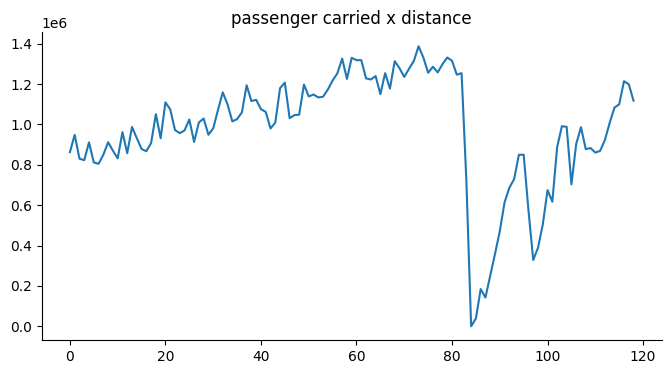

In [57]:
data['passenger_kms_performedth'].plot(kind='line', figsize=(8, 4), title='passenger carried x distance')
plt.gca().spines[['top', 'right']].set_visible(False)

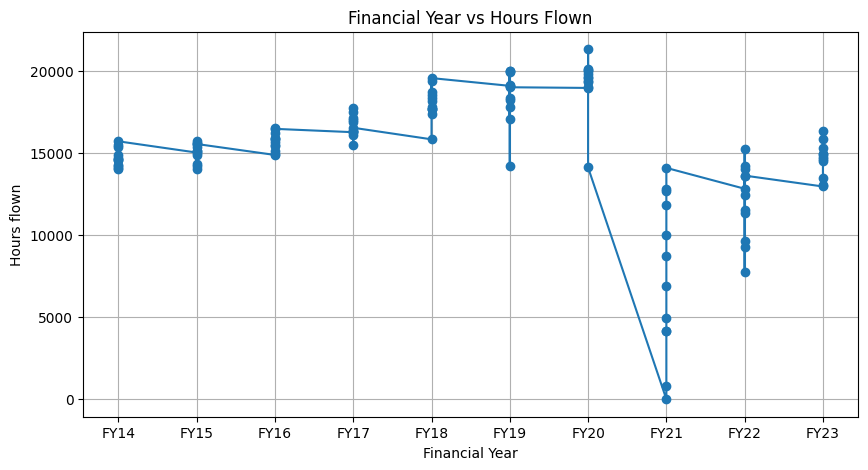

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(data['fy'], data['hours'], marker = 'o')
plt.xlabel('Financial Year')
plt.ylabel('Hours flown')
plt.title('Financial Year vs Hours Flown')
plt.grid(True)
plt.show()


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

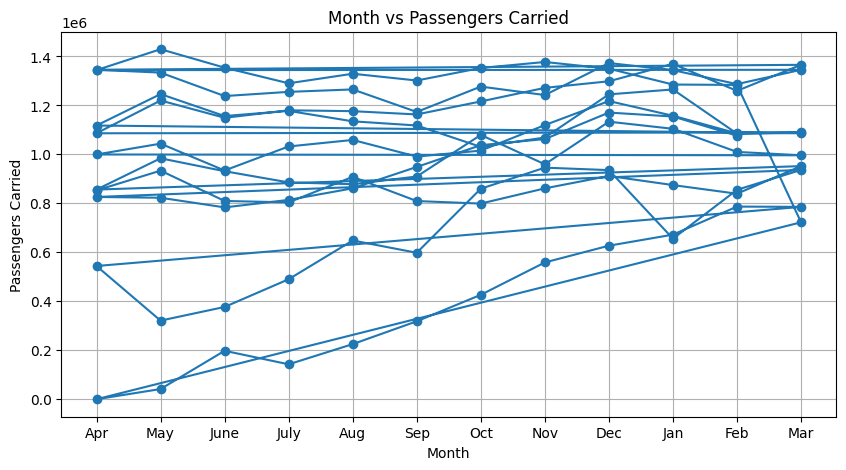

In [32]:
plt.figure(figsize = (10, 5))
plt.plot(data['month'], data['passengers_carried'], marker = 'o')
plt.xlabel('Month')
plt.ylabel('Passengers Carried')
plt.title('Month vs Passengers Carried')
plt.grid(True)
plt.show()

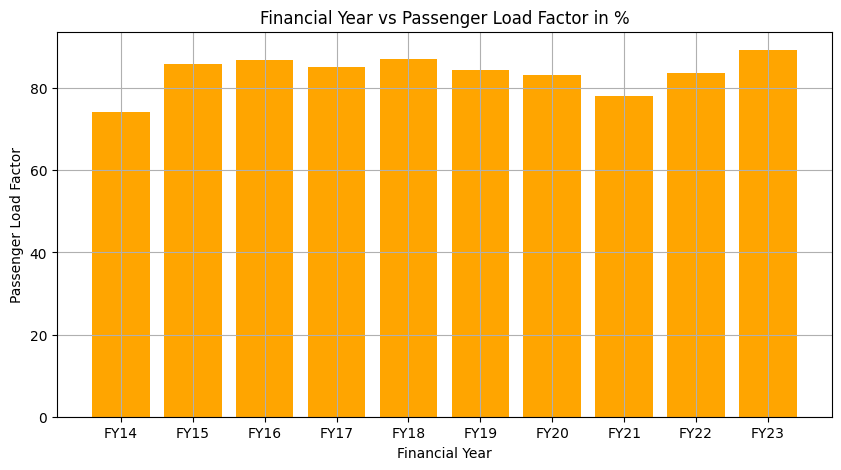

In [35]:
plt.figure(figsize = (10, 5))
plt.bar(data['fy'], data['pax_load_factorin'], color = 'orange')
plt.xlabel('Financial Year')
plt.ylabel('Passenger Load Factor')
plt.title('Financial Year vs Passenger Load Factor in %')
plt.grid(True)

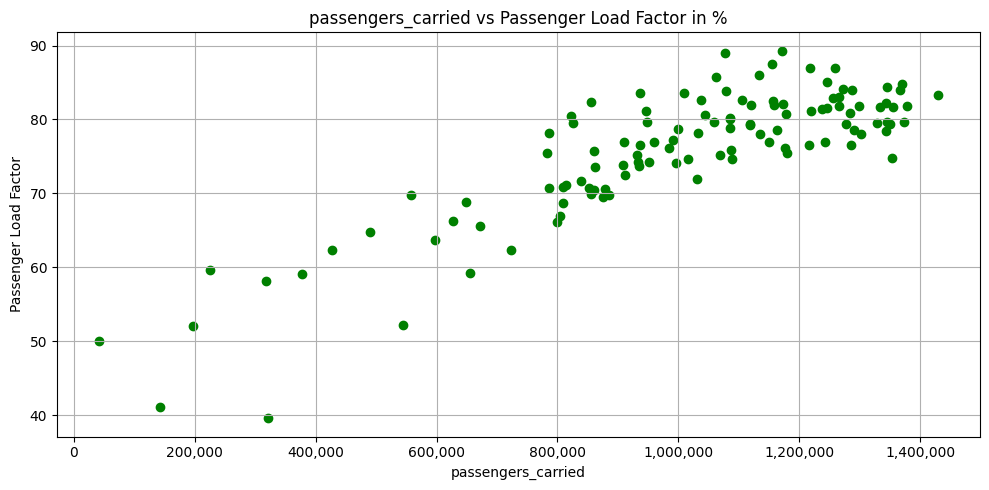

In [41]:
import matplotlib.ticker as ticker

filtered_data = data[(data['passengers_carried'] > 0) & (data['pax_load_factorin'] > 0)]


plt.figure(figsize = (10, 5))
plt.scatter(filtered_data['passengers_carried'], filtered_data['pax_load_factorin'], color = 'green')
plt.xlabel('passengers_carried')
plt.ylabel('Passenger Load Factor')
plt.title('passengers_carried vs Passenger Load Factor in %')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(True)
plt.tight_layout()



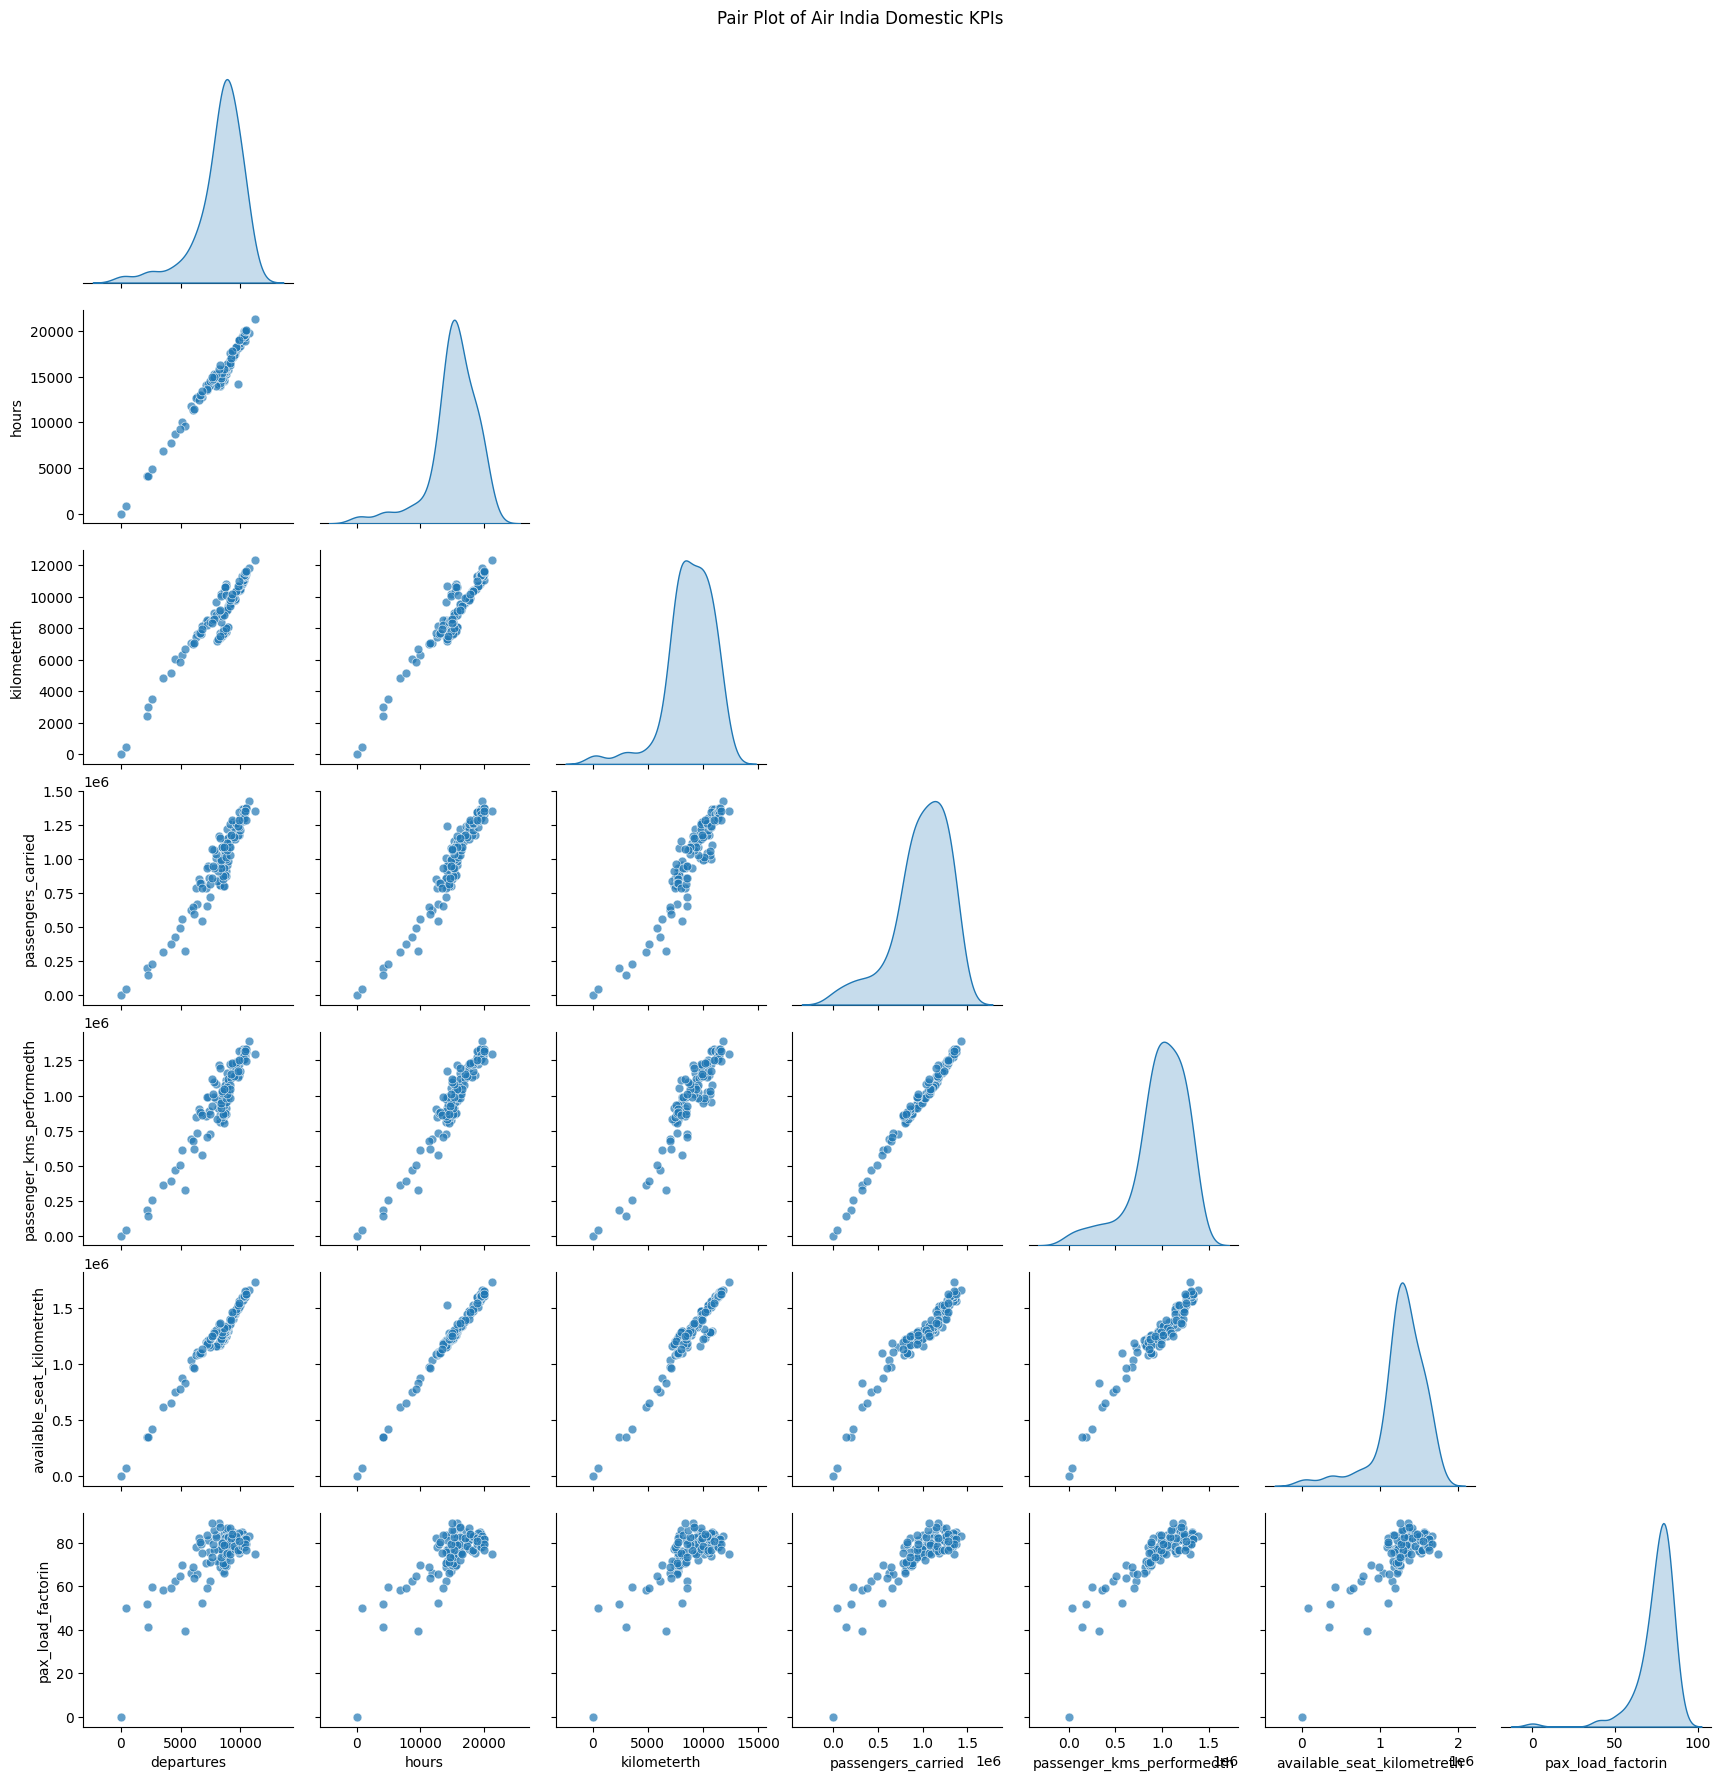

In [43]:
numeric_cols = [
    'departures',
    'hours',
    'kilometer_th',
    'passengers_carried',
    'passenger_kms_performed_th',
    'available_seat_kilometre_th',
    'pax_load_factorin'
]

sns.pairplot(data, corner=True, plot_kws={'alpha': 0.7, 's': 40}, diag_kind='kde')
plt.suptitle('Pair Plot of Air India Domestic KPIs', y=1.02)
plt.show()

<Axes: >

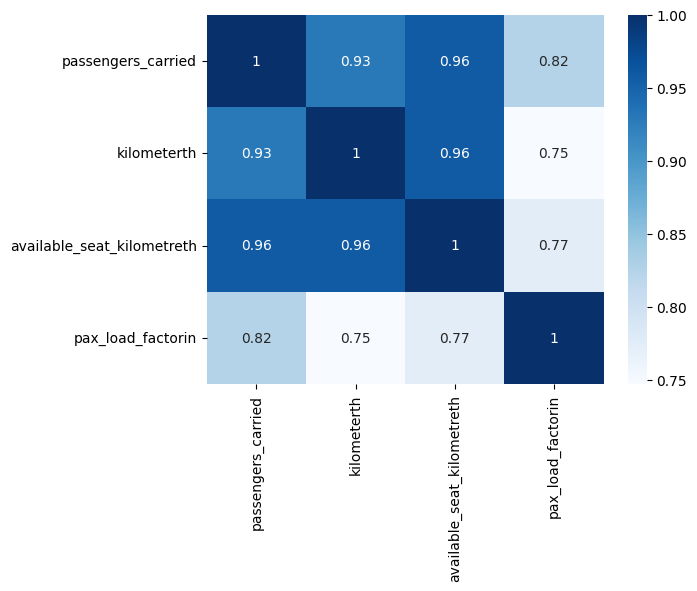

In [73]:
corr = data[['passengers_carried', 'kilometerth', 'available_seat_kilometreth', 'pax_load_factorin']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
data

,month,departures,hours,kilometerth,passengers_carried,passenger_kms_performedth,available_seat_kilometreth,pax_load_factorin,fy
0,Apr,8331.0,13998.0,7670.0,852743.0,862694.0,1219041.0,70.8,FY14
1,May,8648.0,14547.0,8039.0,933573.0,948498.0,1277627.0,74.2,FY14
2,June,8279.0,14232.0,7367.0,809681.0,830542.0,1170875.0,70.9,FY14
3,July,8562.0,14860.0,7725.0,803943.0,822897.0,1227813.0,67.0,FY14
4,Aug,8547.0,14666.0,7756.0,908224.0,911328.0,1232691.0,73.9,FY14
...,...,...,...,...,...,...,...,...,...
114,Oct,7973.0,15282.3,8852.6,1037506.0,1083365.8,1310613.7,82.7,FY23
115,Nov,7761.0,14921.9,8586.3,1062524.0,1099937.6,1283540.4,85.7,FY23
116,Dec,8239.0,15839.7,9084.0,1170659.0,1214285.0,1359169.0,89.3,FY23
117,Jan,8295.0,16310.5,9174.5,1154581.0,1199173.8,1370587.0,87.5,FY23


In [65]:
x = data[['kilometerth', 'passengers_carried', 'passenger_kms_performedth', 'available_seat_kilometreth']]
y = data['pax_load_factorin']

In [77]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [68]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [69]:
ypred = model.predict(xtest)

In [70]:
print('Mean Squared Error:', mean_squared_error(ytest, ypred))

Mean Squared Error: 15.387868843403048


In [81]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(xtrain, ytrain)
y_pred_ridge = ridge.predict(xtest)

from sklearn.metrics import mean_squared_error
print("Ridge MSE:", mean_squared_error(ytest, y_pred_ridge))


Ridge MSE: 15.387868786363137
